In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [89]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


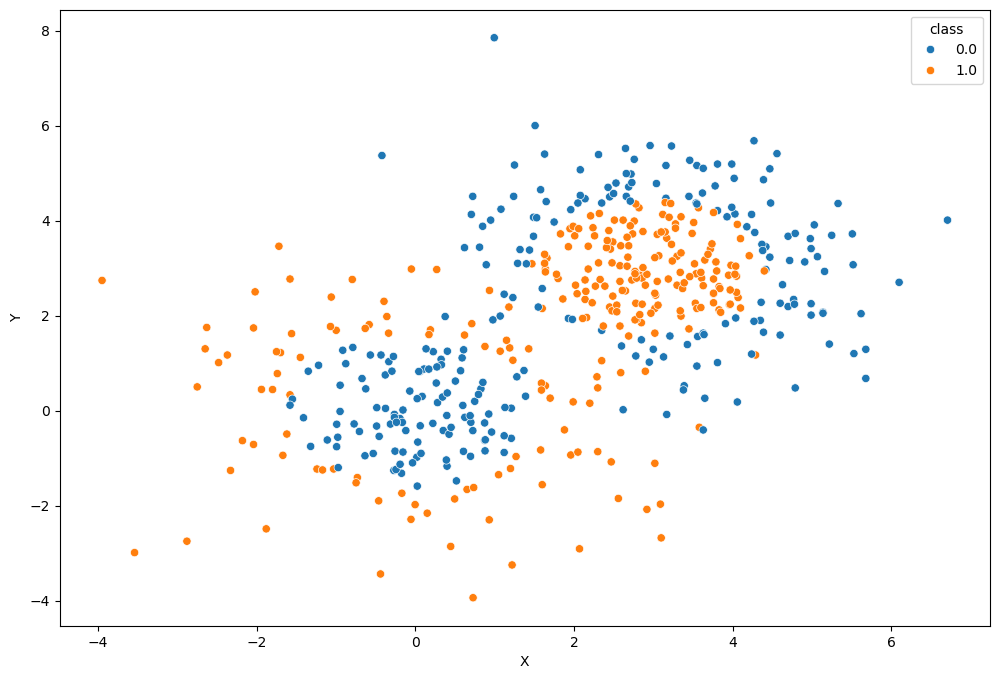

In [90]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [91]:
from sklearn.linear_model import LogisticRegression

### Your code is here
X = circ[['X', 'Y']]
y = circ['class']

model = LogisticRegression()
model.fit(X, y)
print(sum(model.predict(X) == y) / X.shape[0])

0.424


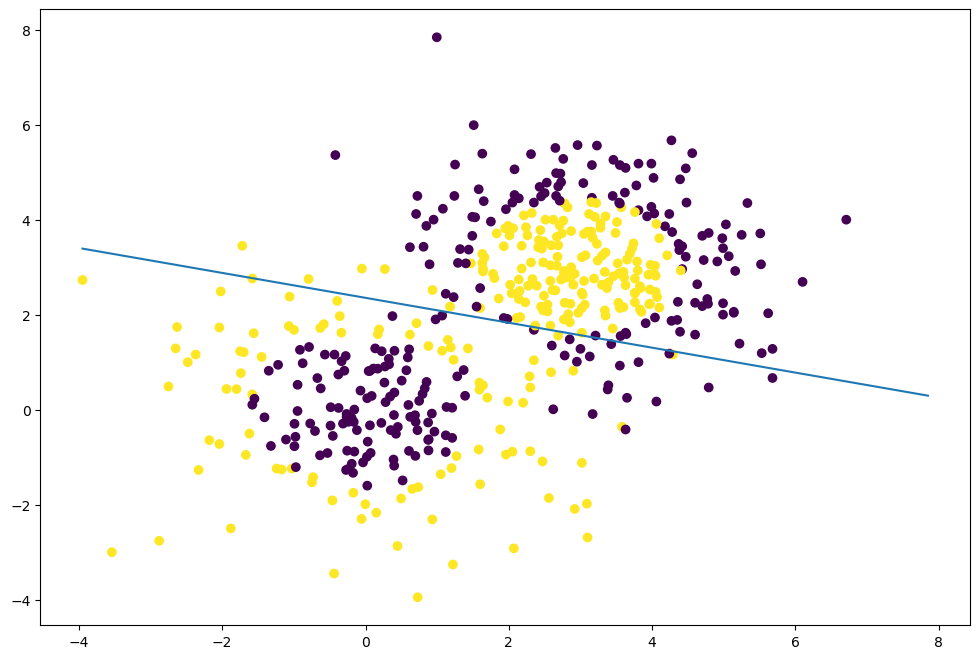

In [92]:
plt.scatter(x=circ['X'], y=circ['Y'], c=y)
X_plot = np.linspace((X[['X']]).min(), (X[['Y']]).max(), 500)
plt.plot(X_plot, (-model.coef_[0][0] * X_plot - model.intercept_[0])/model.coef_[0][1])
plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [93]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [95]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
all_k = [1, 3, 10, 30, 40, 60]
list_KNN = []
accuracy_KNN = []

### Your code is here
for i in all_k: 
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(X_train, y_train) 
    list_KNN.append(model_KNN) 

    y_pred = model_KNN.predict(X_test)
    accuracy_KNN.append((sum(y_pred == y_test))/(y_pred.shape[0]))

    
for index, i in enumerate(list_KNN):
    print(f'Для K={i} Accuracy={accuracy_KNN[index]}')

Для K=KNeighborsClassifier(n_neighbors=1) Accuracy=0.89
Для K=KNeighborsClassifier(n_neighbors=3) Accuracy=0.87
Для K=KNeighborsClassifier(n_neighbors=10) Accuracy=0.85
Для K=KNeighborsClassifier(n_neighbors=30) Accuracy=0.74
Для K=KNeighborsClassifier(n_neighbors=40) Accuracy=0.75
Для K=KNeighborsClassifier(n_neighbors=60) Accuracy=0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [96]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

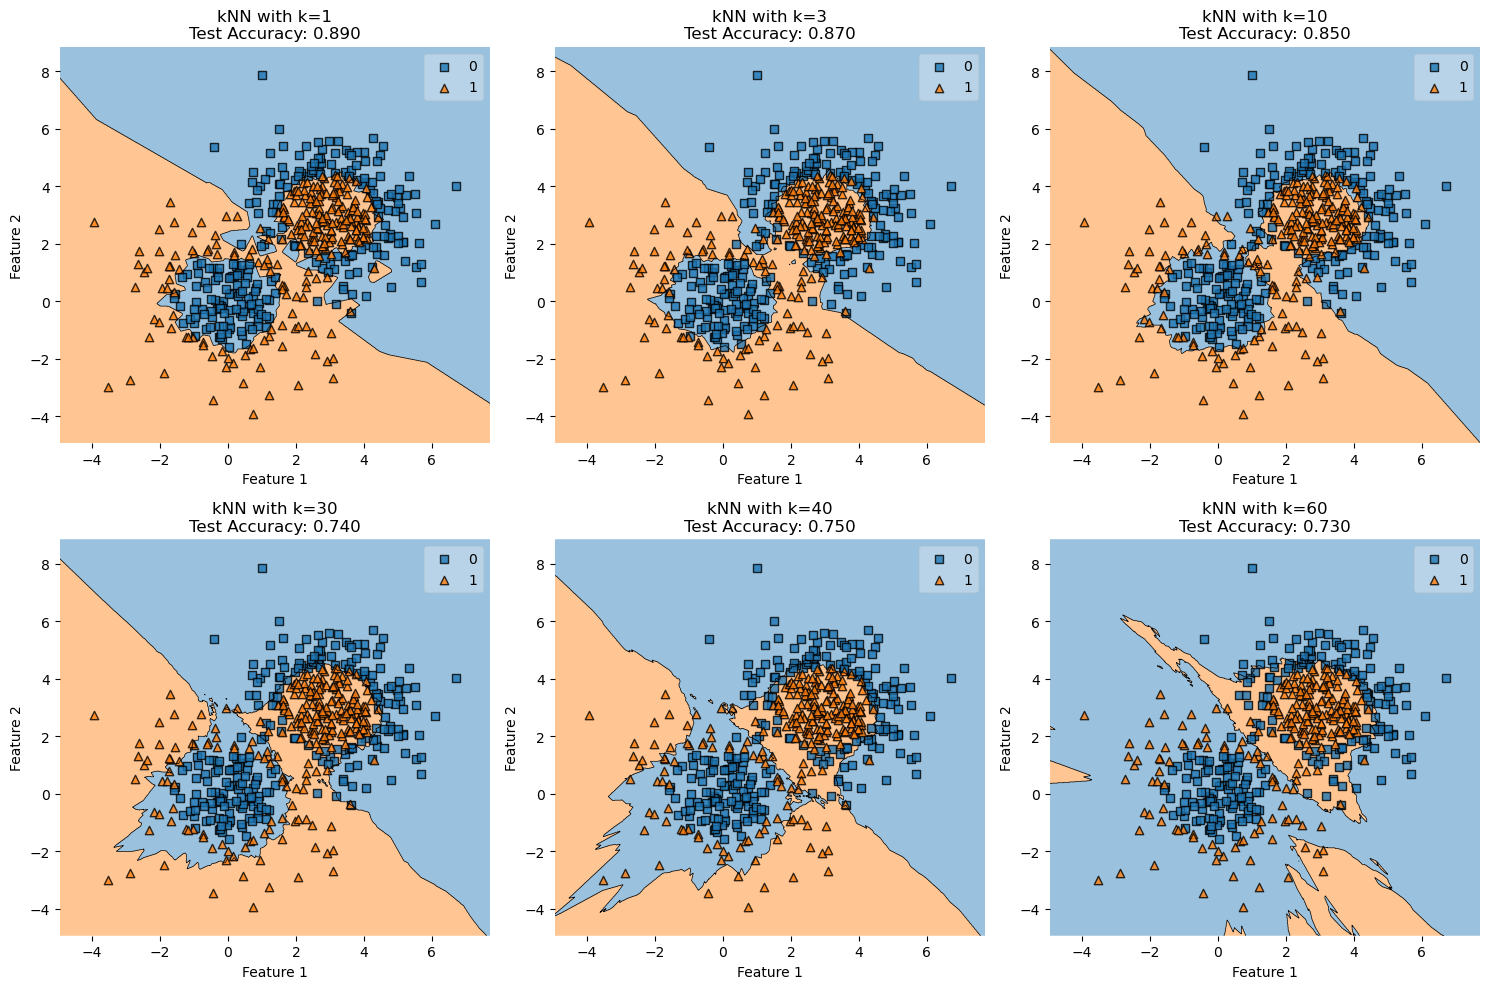

In [98]:
### Your code is here
from matplotlib import gridspec

# Определяем layout для subplots
n_models = len(list_KNN)
n_cols = 3  # 3 графика в строке
n_rows = (n_models + n_cols - 1) // n_cols 

fig = plt.figure(figsize=(15, 5 * n_rows))
gs = gridspec.GridSpec(n_rows, n_cols)

for idx, (model, k_value) in enumerate(zip(list_KNN, all_k)):
    row = idx // n_cols
    col = idx % n_cols
    
    ax = plt.subplot(gs[row, col])
    plot_decision_regions(X, y, clf=model, ax=ax)
    
    accuracy = accuracy_KNN[idx]
    ax.set_title(f'kNN with k={k_value}\nTest Accuracy: {accuracy:.3f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [15]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [19]:
### Your code is here

all_k = [1, 5, 10]
list_KNN = []
accuracy_KNN = []

### Your code is here
for i in all_k: 
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(X_train, y_train) 
    list_KNN.append(model_KNN) 

    y_pred = model_KNN.predict(X_test)
    accuracy_KNN.append((sum(y_pred == y_test))/(y_pred.shape[0]))


print('Результаты для не отнормированных данных:')    
for index, i in enumerate(list_KNN):
    print(f'Для K={i} Accuracy={accuracy_KNN[index]}')

Результаты для не отнормированных данных:
Для K=KNeighborsClassifier(n_neighbors=1) Accuracy=0.43819542019519236
Для K=KNeighborsClassifier() Accuracy=0.44317016671097104
Для K=KNeighborsClassifier(n_neighbors=10) Accuracy=0.4703603843086621


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

all_k = [1, 5, 10]
list_KNN = []
accuracy_KNN = []

### Your code is here
for i in all_k: 
    pipe = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=i))])
    pipe.fit(X_train, y_train) 
    list_KNN.append(pipe) 

    y_pred = pipe.predict(X_test)
    accuracy_KNN.append((sum(y_pred == y_test))/(y_pred.shape[0]))


print('Результаты для отнормированных данных:')    
for index, i in enumerate(list_KNN):
    print(f'Для K={i} Accuracy={accuracy_KNN[index]}')

Результаты для отнормированных данных:
Для K=Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=1))]) Accuracy=0.5648805681084571
Для K=Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]) Accuracy=0.6303877264269168
Для K=Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=10))]) Accuracy=0.6607678578209851


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [30]:
### Your code is here

def kernel(distances, h=1):
        return ((distances)**h)**(1/h)

In [31]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(weights=kernel, n_neighbors = 10))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=10,
                                      weights=<function kernel at 0x177923f60>))])

In [32]:
print(f"Качество на трейне: {np.mean(pipe.predict(X_train) == y_train).round(3)}")

print(f"Качество на тесте: {np.mean(pipe.predict(X_test) == y_test).round(3)}")

Качество на трейне: 0.657
Качество на тесте: 0.66


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [46]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


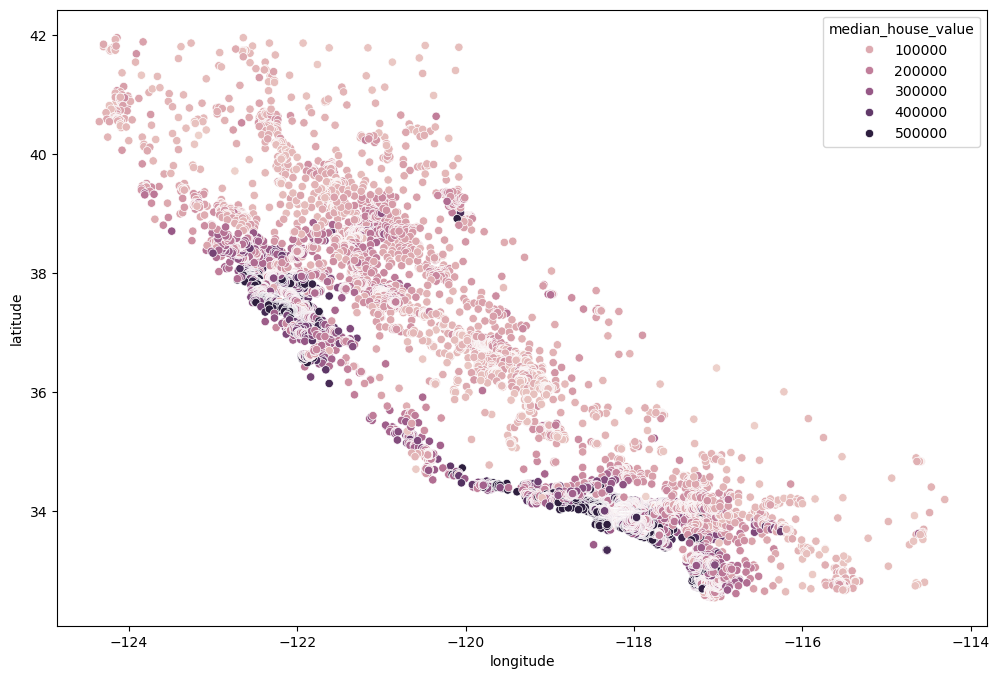

In [47]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y);

Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках:

In [50]:
### Your code is here
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
np.sqrt(mean_squared_error(y_test, y_test_pred))

np.float64(98369.87709657698)

In [51]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

np.float64(100948.39976676002)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


param_grid = {
    'KNN__n_neighbors': list(range(1, 10))
}

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsRegressor())])

search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',)

search.fit(X_train,y_train)

print(f"Лучшие параметры (CV score={-search.best_score_:.5f}):")
print(search.best_params_)

Лучшие параметры (CV score=2900812307.17268):
{'KNN__n_neighbors': 7}


In [79]:
from sklearn.neighbors import KernelDensity

for h in [0.02, 0.1]:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn = KNeighborsRegressor(n_neighbors=8, weights=kernel)
    knn.fit(X_train, y_train)
    
    preds_test = knn.predict(X_test)
    print(-np.sqrt(mean_squared_error(y_test, preds_test)), h)


-52082.81683724866 0.02
-52309.99705647356 0.1
